# Exercise 3 - Linear regression optimisation

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Read the data in separate variables for the training and test sets.

In [22]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

In [23]:
dataset_train

,x,y
0,-1.000000,-1.859783
1,0.333333,2.768337
2,1.666667,3.246021
3,3.000000,1.784168
4,4.333333,2.175140
5,5.666667,4.943162
6,7.000000,4.760092
7,8.333333,8.117031
8,9.666667,9.613291
9,11.000000,5.546479


In [24]:
dataset_test

,x,y
0,-0.300000,0.724588
1,0.833333,5.358981
2,2.166667,3.353027
3,3.200000,2.264404
4,4.833333,3.778459
5,6.166667,5.018581
6,7.500000,7.176838
7,8.833333,8.882545
8,10.166667,9.039228
9,11.500000,6.017476


In [25]:
X_train = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test = dataset_test['x'].values
y_test = dataset_test['y'].values

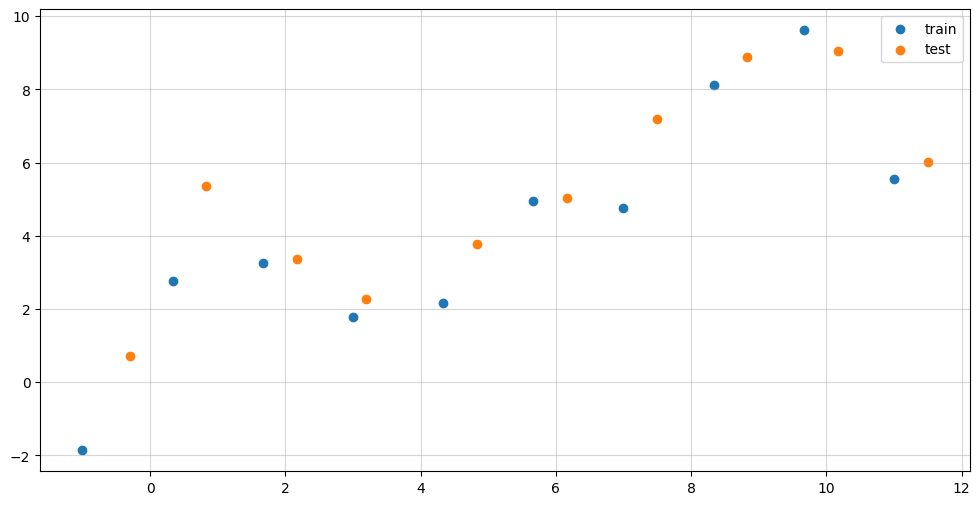

In [26]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [27]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [28]:
# TODO: implement the training method. The pseudo-code here is mostly for the normal equation. Adapt to your needs.

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def linear_regression_normal_equation(X, y): # https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/ use for this case
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_y = np.dot(X_transpose, y)
     
    try:
        theta = np.linalg.solve(X_transpose_X, X_transpose_y)
        return theta
    except np.linalg.LinAlgError:
        return None
    
    
def fit(X_train: np.array, y_train: np.array, order: int) -> np.array:
    # Generate polynomial features
    #print("--------------------------------------")
    thetas = []
    X_poly = np.column_stack([X_train ** i for i in range(order + 1)])
    theta = linear_regression_normal_equation(X_poly, y_train)
    thetas.append(theta)
        #print(f"Iteration {_}, Cost: {cost}")
    #print(f"Here is the theta : {theta}")
    return thetas


def predict(thetas: np.array, X: np.array) -> np.array:
    num_thetas = len(thetas) # On compte combien de parametres
    num_samples = len(X) # On compte combien de valeurs dans X nous avons
    y_pred = np.zeros(num_samples) # On cree un tableau vide de la même taille que notre len(X) pour stocker les preds
    
    for i in range(num_thetas):
        theta = thetas[i]
        poly = np.poly1d(np.flip(theta))  # On crée un polynôme en inversant l'ordre des coefs de theta
        y_pred += poly(X) # On évalue le poly avec nos données et l'ajoute aux prédictions existantes
    
    return y_pred

Order=0; cost on train set: 1.41; cost on test set: 1.68
Order=1; cost on train set: 1.35; cost on test set: 1.61
Order=2; cost on train set: 1.31; cost on test set: 1.54
Order=3; cost on train set: 0.20; cost on test set: 1.03
Order=4; cost on train set: 0.20; cost on test set: 0.98
Order=5; cost on train set: 0.14; cost on test set: 2.19
Order=6; cost on train set: 0.11; cost on test set: 4.39
Order=7; cost on train set: 0.05; cost on test set: 1.52
Order=8; cost on train set: 0.00; cost on test set: 137.79
Order=9; cost on train set: 0.00; cost on test set: 229.97


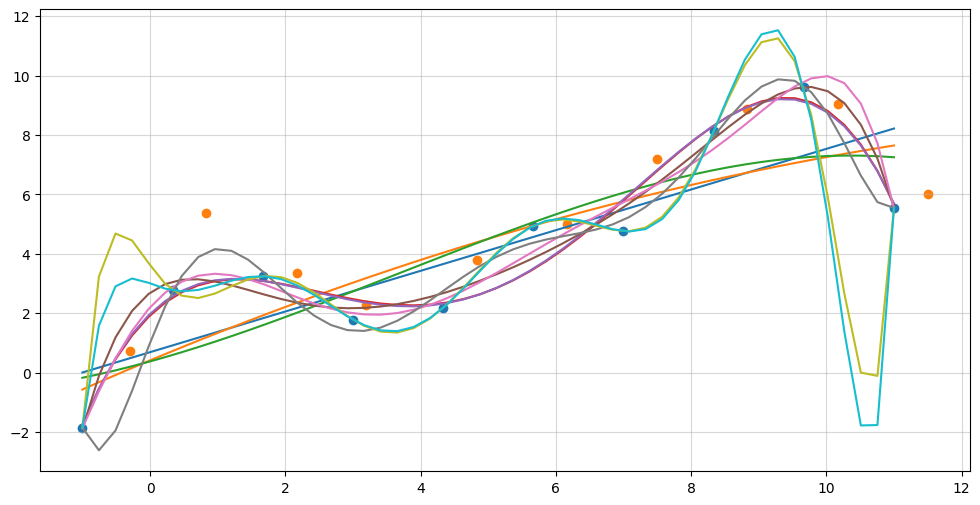

In [29]:
plt.figure(figsize=(12, 6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

train_cost_curve = []
test_cost_curve = []
for order in range(0,10):
    thetas = fit(X_train, y_train, order + 1) # Fit the model with the current order
    x = np.linspace(np.min(X_train), np.max(X_train))  # Generate x values for plotting
    
    # Predict and plot the curve
    y_train_pred = predict(thetas, x)
    plt.plot(x, y_train_pred)

    # Test on train set
    y_train_pred = predict(thetas, X_train)
    cost_train = compute_cost(y_train, y_train_pred)
    train_cost_curve.append(cost_train)

    # Test on test set
    y_test_pred = predict(thetas, X_test)
    cost_test = compute_cost(y_test, y_test_pred)
    test_cost_curve.append(cost_test)

    print(f"Order={order}; cost on train set: {cost_train:.2f}; cost on test set: {cost_test:.2f}")

# Add legend to the plot
plt.show()

e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

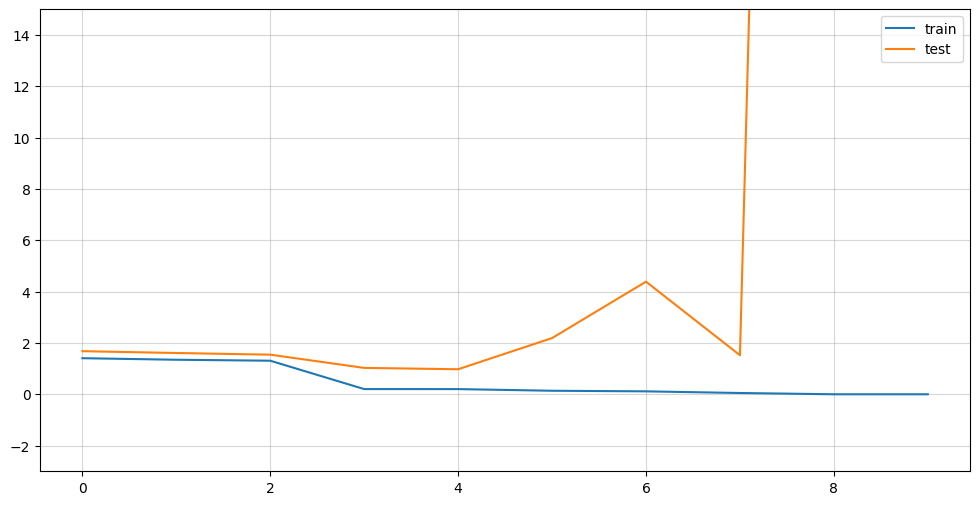

In [30]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(train_cost_curve)
plt.plot(test_cost_curve)
plt.ylim(-3, 15)
plt.legend(['train', 'test']);

**f) What is your best model according to these costs ? Comment your answer.**

According to the costs calculated for both the training and test sets, the best model appears to be the one with polynomial order 4. This choice is based on the lowest cost observed in the test set, indicating that the model with an order of 4 performs best in terms of minimizing prediction errors on unseen data.

**g) Would you still choose the model with the lowest cost for production?**

Yes, even though the curve for the model with polynomial order 4 is already very close to perfection, I would still choose it for production. While the model seems nearly ideal, the aim is always to minimize errors as much as possible. Choosing the model with the lowest cost ensures that we are making predictions with the highest accuracy, which is crucial in real-world applications.

**h) Explain how under/over-fitting is involved here.**

In the context of this problem, underfitting and overfitting refer to how well the model generalizes to new, unseen data.

- **Underfitting:** Underfitting occurs when the model is too simplistic to capture the underlying patterns in the data. In this case, the polynomial degree is too low, and the model fails to fit the training data accurately. This mode will result in high errors on both the training and test sets, as the model cannot predict well. 

- **Overfitting:** Overfitting happens when the model is excessively trained on our data, capturing noise in the training data rather than the actual patterns. This often occurs with high-degree polynomials, where the model fits the training data perfectly but performs poorly on unseen data because it has essentially memorized the training set, including its noise.

The choice of the polynomial order is crucial in balancing these two issues. A polynomial of degree 4 strikes a balance here, providing a good fit to the data without being overly simplistic or excessively trained. This results in lower errors on both the training and test sets, indicating a well-generalizing model for this particular problem.
For example, if we take the polynomial order 9, we can see the mse of the train set at 0 which is very low but the mse of the test set is incredibly high with more than 200. So this is what we call overfitting. On the other hand, the order 0 is not that good compared to the others so this is underfitting.
